# Projeto 2 - C Dados

_Português - Este Projeto está atualmente sendo mantido por Enricco Gemha, Paola BBS Friedel, Rafael C Leventhal, Marcelo R Barranco._

_English - This Project is currently being held by Enricco Gemha, Paola BBS Friedel, Rafael C Leventhal, Marcelo R Barranco._

## Aviso
Para nos referirmos a certos termos recorrentes, usaremos abreviações, todas listadas abaixo:
- df: DataFrame
- pd: biblioteca do Python chamada Pandas

## Kickstart do Projeto

In [4]:
# importando bibliotecas que serão utilizadas e definindo ajustes
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [18]:
# transformando a database em um df do pd
students = pd.read_csv('students.csv')

In [19]:
# checando o df
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Limpando o df

**Próximo passo**: Retirar as features (colunas) cujas informações não serão utilizadas nesse projeto.

In [20]:
students.drop(columns='school', inplace=True)
students

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,LE3,A,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,M,21,R,GT3,T,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,M,18,R,LE3,T,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


## Estabelecendo o df de treinamento

A próxima etapa é transformar é dar uma nova "roupagem" para o df `students`, criando variáveis dummies para as colunas que contém variáveis qualitativas, o que facilita o seu entendimento.

In [21]:
train = students.copy()
label_dummies = []
for column in train.columns:
    if train[column].dtype.kind == 'O':
        dummies = pd.get_dummies(train[column]).iloc[:, 1:]
        label_dummies.append(dummies.columns.values.tolist())
        dummies.columns = [f'{column}_{col}' for col in dummies.columns]
        train = pd.concat(
            [
                train, dummies
            ], axis=1
        )
        train.drop(columns=column, inplace=True)
train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


## Análise Exploratória

**Próximo passo**: Com o objetivo de encontrar features que possuem forte correlação, ou seja, cujos temas convergem, devemos utilizar o comando `.corr()` para obter as correlações entre as features do df. Vale lembrar que uma correlação é forte se: `|corr| >= 0.7`

In [22]:
# separando o target e as features em 2 variáveis diferentes
target = train.G3.to_numpy()
features = train.drop(columns='G3').to_numpy()
features

array([[18,  4,  4, ...,  1,  0,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [21,  1,  1, ...,  1,  0,  0],
       [18,  3,  2, ...,  1,  1,  0],
       [19,  1,  1, ...,  1,  1,  0]], dtype=int64)

Para verificar se há alguma feature que possui correlação forte com outra feature, montamos um df com as correlações entre as colunas e linhas, cruzando todas as features entre si.

In [23]:
df_features = (train.drop(columns='G3'))
features_corr = df_features.corr()
for coluna in list(features_corr):
    for correlation in features_corr[coluna]:
        if correlation >= 0.7 and correlation != 1.0:
            print(correlation)
            print(f'coluna: {coluna}')
            print('\n')

0.852118066364806
coluna: G1


0.852118066364806
coluna: G2




Após a análise do df `features_corr` pode-se concluir que todas as features que foram comparadas entre si tem correlação fraca ou moderada, exceto `G1` e `G2`, que serão cruciais para, mais a frente, analisar o comportamento do target `G3`. Portanto, conclui-se não se deve descartar nenhuma variável que possua correlação forte com outra.

## Relacionando target com features

**Próximo passo**: agora que testamos a correlação entre as features, partiremos para correlacionar a variável `target` com cada feature individualmente. 

In [24]:
df_target = (train.drop(columns='G3'))
target_corr = df_target.corrwith(train.G3, method='pearson')
target_corr.sort_values(ascending=True, inplace=True)
target_corr

failures            -0.360415
age                 -0.161579
goout               -0.132791
romantic_yes        -0.129970
traveltime          -0.117142
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
health              -0.061335
Pstatus_T           -0.058009
Dalc                -0.054660
Fjob_other          -0.053483
Walc                -0.051939
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
freetime             0.011307
activities_yes       0.016100
guardian_mother      0.022338
absences             0.034247
famrel               0.051363
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Mjob_services        0.078429
famsize_LE3          0.081407
Fjob_teacher         0.095374
reason_reputation    0.095692
studytime            0.097820
internet_yes         0.098483
paid_yes             0.101996
sex_M                0.103456
address_U 

Portanto, pode-se confirmar que `target_corr` apresenta somente forte correlação com G1 e G2, enquanto com o restante possui correlação baixa.

### Gráfico de box

Para melhorar a visualização de variáveis qualitativas, usaremos o `boxplot`.

In [25]:
students_columns = ['famsup','guardian','internet','famsize','paid','Pstatus','Fjob','Mjob','schoolsup','nursery','address','activities','romantic','guardian','sex','higher','reason']


In [26]:
boxplot_target = pd.concat([train, df_target], axis=1)

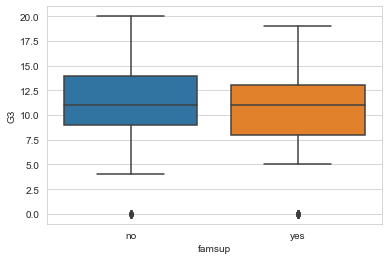

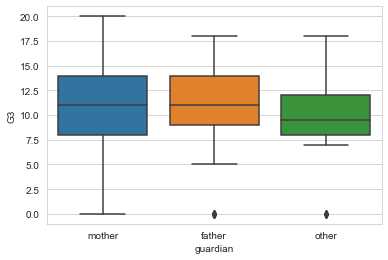

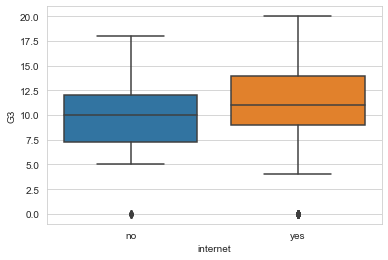

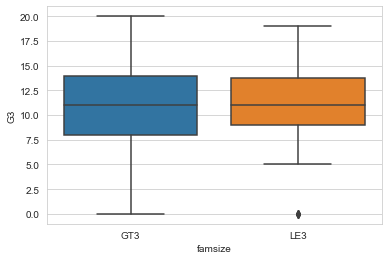

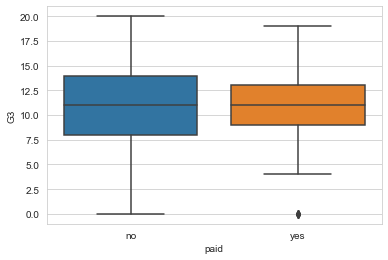

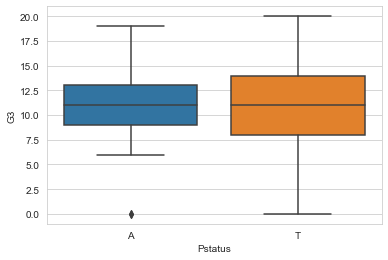

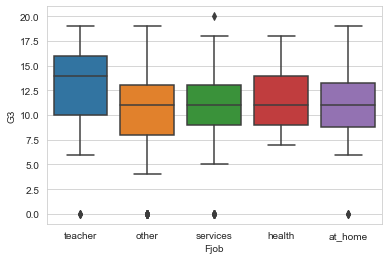

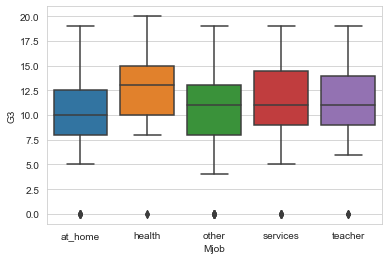

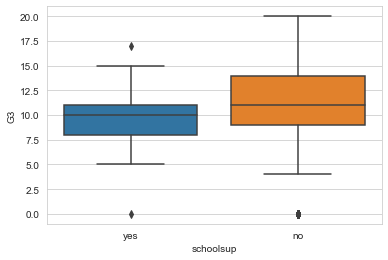

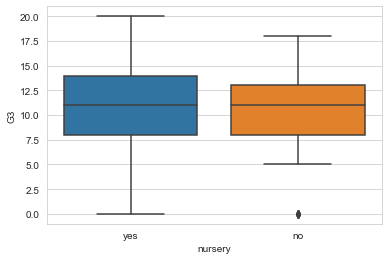

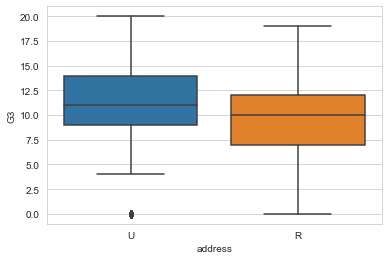

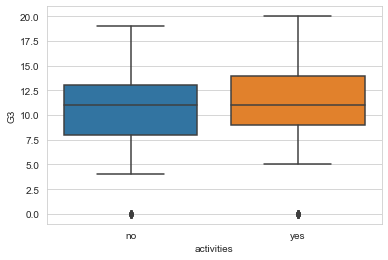

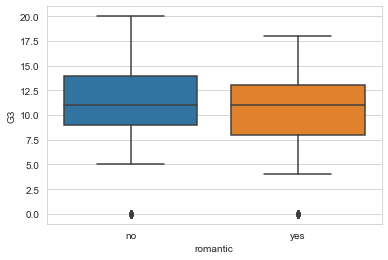

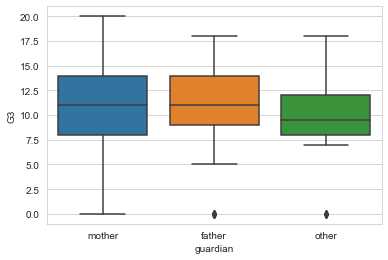

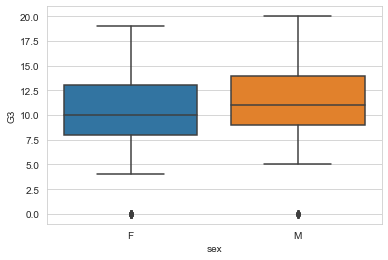

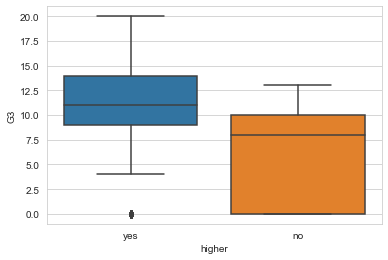

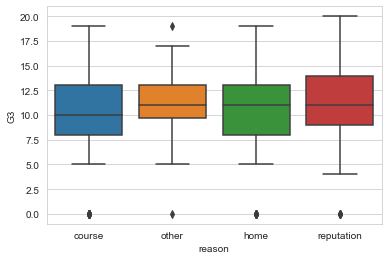

In [14]:
for qlt_col in students_columns:
    sns.set_style("whitegrid")
    sns.boxplot(x = f'{qlt_col}', y = 'G3', data = (students))
    plt.show();

Interpretaremos os resultados acima na próxima secção.

## Modelo

### Regressão Linear

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# abs(Y_test - abs(Y_pred)).mean()
print(f'Erro absoluto médio: {mean_absolute_error(Y_test, Y_pred)}')
print(f'Raiz do erro quadrático médio: {mean_squared_error(Y_test, Y_pred)**0.5}')
print(f'R²: {r2_score(Y_test, Y_pred)}')



Erro absoluto médio: 1.3901043611473454
Raiz do erro quadrático médio: 2.2054825880991764
R²: 0.7252244798007325


### Resultados para 10 ciclos - Regressão Linear

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

resultados = []

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    resultados.append([
        mean_absolute_error(Y_test, Y_pred), 
        mean_squared_error(Y_test, Y_pred)**0.5, 
        r2_score(Y_test, Y_pred)

    ])
    
resultados = np.array(resultados).mean(axis=0)
print(f'Erro absoluto médio: {resultados[0]}')
print(f'Raiz do erro quadrático médio: {resultados[1]}')
print(f'R²: {resultados[2]}')


Erro absoluto médio: 1.4247921327971653
Raiz do erro quadrático médio: 2.1541572670171725
R²: 0.784333879619208


### KNN 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# abs(Y_test - abs(Y_pred)).mean()
print(f'Erro absoluto médio: {mean_absolute_error(Y_test, Y_pred)}')
print(f'Raiz do erro quadrático médio: {mean_squared_error(Y_test, Y_pred)**0.5}')
print(f'R²: {r2_score(Y_test, Y_pred)}')


Erro absoluto médio: 1.6050420168067228
Raiz do erro quadrático médio: 2.604133753293409
R²: 0.6897938484000801


### Resultados para 10 ciclos - KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

resultadosKNN = []

for _ in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
    model2 = KNeighborsClassifier()
    model2.fit(X_train, Y_train)
    Y_pred = model2.predict(X_test)
    resultadosKNN.append([
        mean_absolute_error(Y_test, Y_pred), 
        mean_squared_error(Y_test, Y_pred)**0.5, 
        r2_score(Y_test, Y_pred)

    ])
    
resultadosKNN = np.array(resultadosKNN).mean(axis=0)
print(f'Erro absoluto médio: {resultadosKNN[0]}')
print(f'Raiz do erro quadrático médio: {resultadosKNN[1]}')
print(f'R²: {resultadosKNN[2]}')

Erro absoluto médio: 1.6638655462184875
Raiz do erro quadrático médio: 2.712217955266246
R²: 0.6446896506868176


## Referências Bibliográficas

- to-do